In [5]:
import argparse
import os
import sys

import uproot
from coffea import hist
from coffea.util import load

In [21]:
result = load('hists_None_trigger_sample_test2.coffea')
outputfile = uproot.recreate("output.root")

listHistos = []
for i in result['jets'].values():
    listHistos.append(i)
    print(i[0]+'_'+i[1]+'_pt')
    outputfile[i[0]+'_'+i[1]+'_pt'] = hist.export1d(result['jets'].integrate('dataset', i[0]).integrate('selection',i[1]).sum('eta', 'mass'))
    outputfile[i[0]+'_'+i[1]+'_mass'] = hist.export1d(result['jets'].integrate('dataset', i[0]).integrate('selection',i[1]).sum('eta', 'pt'))
    outputfile[i[0]+'_'+i[1]+'_eta'] = hist.export1d(result['jets'].integrate('dataset', i[0]).integrate('selection',i[1]).sum('mass', 'pt'))
    
outputfile.close()

SingleMuon2017C_njetsBasic_pt
SingleMuon2017C_basetrigger_pt
SingleMuon2017C_triggerAK8PFJet140_pt
SingleMuon2017C_triggerAK8PFJet200_pt
SingleMuon2017C_triggerAK8PFJet260_pt
SingleMuon2017C_triggerAK8PFJet320_pt
SingleMuon2017C_triggerAK8PFJet400_pt
SingleMuon2017C_triggerAK8PFJet450_pt
SingleMuon2017C_triggerAK8PFJet500_pt
SingleMuon2017B_njetsBasic_pt
SingleMuon2017B_basetrigger_pt
SingleMuon2017B_triggerAK8PFJet140_pt
SingleMuon2017B_triggerAK8PFJet200_pt
SingleMuon2017B_triggerAK8PFJet260_pt
SingleMuon2017B_triggerAK8PFJet320_pt
SingleMuon2017B_triggerAK8PFJet400_pt
SingleMuon2017B_triggerAK8PFJet450_pt
SingleMuon2017B_triggerAK8PFJet500_pt


In [22]:
#### Translate to root
import ROOT
%jsroot

canvas = {} ### needed to plot several histos in a loop
histDict = {}

inFile = ROOT.TFile('output.root')

for q in listHistos:
    for k in ['pt','mass','eta']:
        histDict[ q[0]+'_'+q[1]+'_'+k ] = inFile.Get(q[0]+'_'+q[1]+'_'+k)

print(histDict)


{'SingleMuon2017C_njetsBasic_pt': <ROOT.TH1D object ("SingleMuon2017C_njetsBasic_pt") at 0x557809c48db0>, 'SingleMuon2017C_njetsBasic_mass': <ROOT.TH1D object ("SingleMuon2017C_njetsBasic_mass") at 0x557805807670>, 'SingleMuon2017C_njetsBasic_eta': <ROOT.TH1D object ("SingleMuon2017C_njetsBasic_eta") at 0x5578056cf280>, 'SingleMuon2017C_basetrigger_pt': <ROOT.TH1D object ("SingleMuon2017C_basetrigger_pt") at 0x5578056bf3d0>, 'SingleMuon2017C_basetrigger_mass': <ROOT.TH1D object ("SingleMuon2017C_basetrigger_mass") at 0x5578056b9c70>, 'SingleMuon2017C_basetrigger_eta': <ROOT.TH1D object ("SingleMuon2017C_basetrigger_eta") at 0x5578056a71a0>, 'SingleMuon2017C_triggerAK8PFJet140_pt': <ROOT.TH1D object ("SingleMuon2017C_triggerAK8PFJet140_pt") at 0x557805694810>, 'SingleMuon2017C_triggerAK8PFJet140_mass': <ROOT.TH1D object ("SingleMuon2017C_triggerAK8PFJet140_mass") at 0x557809f43230>, 'SingleMuon2017C_triggerAK8PFJet140_eta': <ROOT.TH1D object ("SingleMuon2017C_triggerAK8PFJet140_eta") at

In [29]:
tLabel = 'triggerAK8PFJet500'

denominator = histDict['SingleMuon2017B_basetrigger_pt'].Clone()
numerator = histDict['SingleMuon2017B_triggerAK8PFJet140_pt'].Clone()

test = ROOT.TEfficiency( numerator, denominator )

canvas[tLabel] = ROOT.TCanvas( tLabel, tLabel, 700, 500)
# denominator.Draw('histe')
# numerator.Draw('histe same')
test.Draw()
canvas[tLabel].Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: triggerAK8PFJet500


In [42]:
import matplotlib.pyplot as plt

import mplhep as hep
%matplotlib inline
# plt.style.use(hep.style.ROOT)
#hep.set_style("CMS")

njetsBasic
basetrigger
triggerAK8PFJet140
triggerAK8PFJet200
triggerAK8PFJet260
triggerAK8PFJet320
triggerAK8PFJet400
triggerAK8PFJet450
triggerAK8PFJet500
[<StringBin (SingleMuon2017B) instance at 0x7f69b2905080>, <StringBin (SingleMuon2017C) instance at 0x7f69b29055c0>]


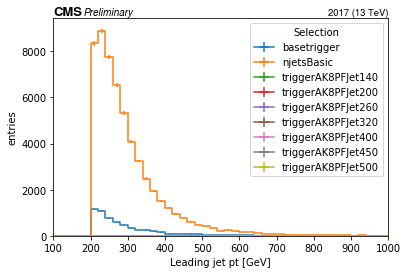

In [17]:
hep.cms.label(data=True,year='2017')
tmpHist = result['jets'].integrate('dataset', ['SingleMuon2017C']).sum('eta','mass').rebin("pt", hist.Bin("newpt", "Leading jet pt [GeV]", 45, 100, 1000))
a = hist.plot1d(tmpHist)
for i in tmpHist.values(): print(i[0])
print(result['jets'].identifiers('dataset'))
#a.set_ylim(0,10)
# a.set_xlim(100,800)


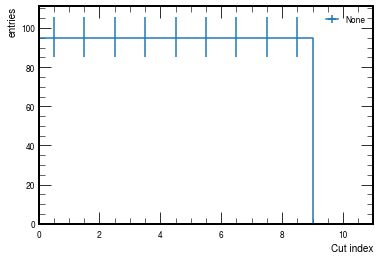

In [37]:
tmpHist = result['cutflow'].integrate('dataset')
a = hist.plot1d(tmpHist)

/home/algomez/miniconda2/envs/my_root_env/lib/python3.7/site-packages/coffea/hist/hist_tools.py:348: RuntimeWarning: Not all requested indices present in <Cat (name=selection) instance at 0x7fc6b1cdb6a0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


KeyError: ()

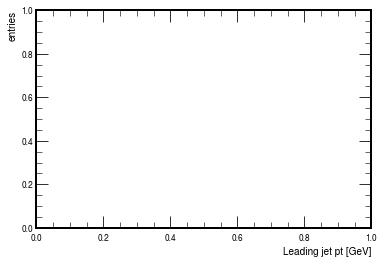

In [8]:
newBin = hist.Bin("newpt", "Leading jet pt [GeV]", 20, 100, 900)
denominator = result['jets'].integrate('dataset').integrate('selection', ['basetrigger']).sum('eta','mass').rebin('pt', newBin)
numerator = result['jets'].integrate('dataset').integrate('selection', ['triggerAK8PFJet450']).sum('eta','mass').rebin('pt', newBin)

ax = hist.plotratio(
    num=numerator,
    denom=denominator,
    error_opts={'color': 'k', 'marker': '.'},
#     unc='num'
)
ax.set_ylim(-0.1,1.1)
# ax.set_xlim(100,1000)

In [ ]:
hep.cms.label(data=True,year='2017')

a = hist.plot1d(result['cutflow'] ) #, overlay='dataset')